In [1]:
print ("The steps that I will follow will be the following:")
print ("1. Introduction")
print ("2. Exploration of Indoors temperature dataset")
print ("3. Stationarity Tests")
print ("4. Univariate Temperature forecasting using smoothing")
print ("5. Univariate Temperature forecasting using SARIMA Model")
print ("6. Multivariate Temperature forecasting using SARIMAX Model")
print ("7. Final Comparison of Models Using MSE")



The steps that I will follow will be the following:
1. Introduction
2. Exploration of Indoors temperature dataset
3. Stationarity Tests
4. Univariate Temperature forecasting using smoothing
5. Univariate Temperature forecasting using SARIMA Model
6. Multivariate Temperature forecasting using SARIMAX Model
7. Final Comparison of Models Using MSE


In [2]:
from IPython.display import Markdown

comment = "**1. Introduction**"
font_size = "20px"

Markdown(f"<span style='font-weight:bold; font-size:{font_size}'>{comment}</span>")

<span style='font-weight:bold; font-size:20px'>**1. Introduction**</span>

In [3]:
print("Our goal for this assignment is to predict the indoors temperature of a greenhouse for every hour for the \
next 24 hours. To start with this, let's have a look at our available data in order to draw a good method for our \
forecasting methods. In the ReadMe.pdf several tables are given, but not all of them are relevant for the indoors \
greenhouse temperature. For example the 'Production' and 'Crop parameters' are relevant for the growth and yield \
of the plants, but not for the temperature of the greenhouse. We won't use these tables. We are going to load the \
two relevant tables that are the 'Weather data', that gives information of the weather conditions outside of the \
greenhouse, and the 'Greenhouse climate' that gives information about the indoor climate, the status of actuators \
and irrigation.")

Our goal for this assignment is to predict the indoors temperature of a greenhouse for every hour for the next 24 hours. To start with this, let's have a look at our available data in order to draw a good method for our forecasting methods. In the ReadMe.pdf several tables are given, but not all of them are relevant for the indoors greenhouse temperature. For example the 'Production' and 'Crop parameters' are relevant for the growth and yield of the plants, but not for the temperature of the greenhouse. We won't use these tables. We are going to load the two relevant tables that are the 'Weather data', that gives information of the weather conditions outside of the greenhouse, and the 'Greenhouse climate' that gives information about the indoor climate, the status of actuators and irrigation.


In [4]:
print("let's import some useful libraries first")

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display
import os
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.5f}'.format
%matplotlib inline
plotsize = (13, 5)

let's import some useful libraries first


In [5]:
print("Let's have a first look at the table of the outdoors weather conditions.")
df_outd = pd.read_csv("/Users/irismanola/Documents/ML/Source_Assignment/Weather.csv")
df_outd.columns
df_outd.head()


Let's have a first look at the table of the outdoors weather conditions.


,time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,"43,815.00000",6.22095,0.00000,0.00000,-72.00000,215.00000,0.00000,80.60000,6.90000,32.00000,4.70000
1,"43,815.00347",6.22095,0.00000,0.00000,-73.00000,0.00000,0.00000,80.60000,6.90000,32.00000,4.70000
2,"43,815.00694",6.20556,0.00000,0.00000,-76.00000,0.00000,0.00000,80.40000,6.90000,32.00000,4.70000
3,"43,815.01042",6.19017,0.00000,0.00000,-77.00000,0.00000,0.00000,80.20000,6.90000,32.00000,4.70000
4,"43,815.01389",6.16262,0.00000,0.00000,-75.00000,0.00000,0.00000,80.90000,6.70000,32.00000,4.70000


In [6]:
print("And now let's have a look at the indoors conditions.")

df_ind = pd.read_csv("/Users/irismanola/Documents/ML/Source_Assignment/GreenhouseClimate.csv")
df_ind.columns
df_ind.head()

And now let's have a look at the indoors conditions.


,time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,...,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,"43,815.00000",0.00000,35.00000,472.00000,0.35480,3.98000,100.00000,7.17000,0.00000,45.20000,...,NaN,0.00000,NaN,25.00000,26.00000,4.00000,NaN,"1,000.00000",NaN,1.20000
1,"43,815.00347",0.00000,85.00000,501.00000,0.53220,3.99000,100.00000,6.94000,0.00000,43.60000,...,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
2,"43,815.00694",0.00000,96.00000,489.00000,0.53220,3.99000,100.00000,7.24000,0.00000,42.30000,...,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
3,"43,815.01042",0.00000,96.00000,497.00000,0.53220,4.00000,100.00000,6.74000,0.00000,41.20000,...,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
4,"43,815.01389",0.00000,96.00000,477.00000,0.53220,4.00000,100.00000,6.71000,0.00000,41.20000,...,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000


In [7]:
print("the columns are too many, so we do the following to see them all:")
pd.set_option('display.max_columns', None)
df_ind.head()

the columns are too many, so we do the following to see them all:


,time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,Rhair,Tair,Tot_PAR,Tot_PAR_Lamps,VentLee,Ventwind,assim_sp,assim_vip,co2_dos,co2_sp,co2_vip,dx_sp,dx_vip,int_blue_sp,int_blue_vip,int_farred_sp,int_farred_vip,int_red_sp,int_red_vip,int_white_sp,int_white_vip,pH_drain_PC,scr_blck_sp,scr_blck_vip,scr_enrg_sp,scr_enrg_vip,t_grow_min_sp,t_grow_min_vip,t_heat_sp,t_heat_vip,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,"43,815.00000",0.00000,35.00000,472.00000,0.35480,3.98000,100.00000,7.17000,0.00000,45.20000,60.60000,20.90000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,NaN,NaN,400.00000,NaN,2.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.27000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,4.00000,NaN,"1,000.00000",NaN,1.20000
1,"43,815.00347",0.00000,85.00000,501.00000,0.53220,3.99000,100.00000,6.94000,0.00000,43.60000,61.40000,20.70000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00034,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.28000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
2,"43,815.00694",0.00000,96.00000,489.00000,0.53220,3.99000,100.00000,7.24000,0.00000,42.30000,60.90000,21.20000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00036,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.28000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
3,"43,815.01042",0.00000,96.00000,497.00000,0.53220,4.00000,100.00000,6.74000,0.00000,41.20000,62.50000,20.70000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00201,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.27000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
4,"43,815.01389",0.00000,96.00000,477.00000,0.53220,4.00000,100.00000,6.71000,0.00000,41.20000,62.70000,20.70000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00155,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.28000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000


In [8]:
print(df_outd.shape)


(47809, 11)


In [9]:
print(df_ind.shape)

(47809, 50)


In [10]:
print(f"Both tables have the same lengths. Every row is a measurement every 5 minutes. Then have have data for \
 {47809*5/60:.1f} hours, which is {47809 * 5/60/24:.1f} days of data, or approximately {47809 * 5/60/24/30:.1f} months.")

Both tables have the same lengths. Every row is a measurement every 5 minutes. Then have have data for  3984.1 hours, which is 166.0 days of data, or approximately 5.5 months.


In [11]:
print ("In the ReadMe.pdf all the variable names are explained. The Tair (Greenhouse Air temperature) is the \
variable that we have to forecast. To do so we can use either univariate (involving only the Tair timeseries) \
or multivariate forecasting methods (involving other given variables that influence the Tair). \
We will start with simple univariate methods and will move towards more complex multivariate methods. For now let's \
focus only on the Tair and explore it.")

In the ReadMe.pdf all the variable names are explained. The Tair (Greenhouse Air temperature) is the variable that we have to forecast. To do so we can use either univariate (involving only the Tair timeseries) or multivariate forecasting methods (involving other given variables that influence the Tair). We will start with simple univariate methods and will move towards more complex multivariate methods. For now let's focus only on the Tair and explore it.


In [12]:
from IPython.display import Markdown

comment = "**2. Exploration of Indoors temperature dataset**"
font_size = "20px"

Markdown(f"<span style='font-weight:bold; font-size:{font_size}'>{comment}</span>")

<span style='font-weight:bold; font-size:20px'>**2. Exploration of Indoors temperature dataset**</span>

Let's see if the time is well set every 5 minutes and without missing variables.


Text(0.5, 1.0, 'Time')

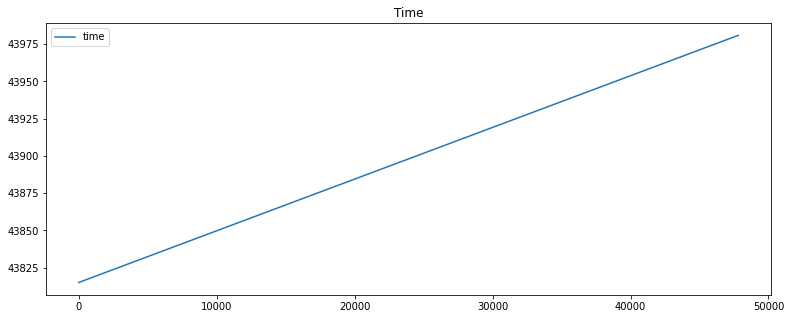

In [13]:
print ("Let's see if the time is well set every 5 minutes and without missing variables.") 
df_ind[['time']].plot(figsize=plotsize)

plt.title('Time')

In [14]:
print ("are there any missing values in the time ?")
time=df_ind[['time']]
time.isnull().sum()


are there any missing values in the time ?


time    0
dtype: int64

In [15]:
print ("the time variable looks nice and linear as it should and there are no missing variables.")

the time variable looks nice and linear as it should and there are no missing variables.


In [16]:
Tair = df_ind[['Tair']]
Tair.head(10)

,Tair
0,20.90000
1,20.70000
2,21.20000
3,20.70000
4,20.70000
5,20.60000
6,20.70000
7,20.60000
8,20.70000
9,21.00000


Text(0.5, 1.0, 'Greenhouse Air temperature')

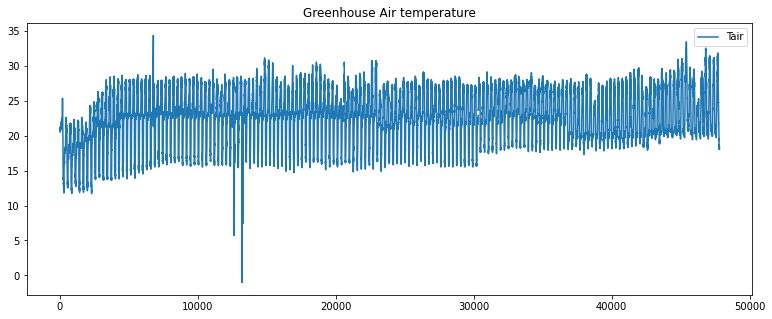

In [17]:
Tair.plot(figsize=plotsize)
plt.title('Greenhouse Air temperature')


In [18]:
statistics = Tair.describe()
print(statistics)

              Tair
count 47,738.00000
mean      22.71351
std        3.92040
min       -1.00000
25%       20.00000
50%       22.80000
75%       26.40000
max       34.32632


In [19]:
print ("There are no crazy outliers to indicate a large mistake in the measurements that need to be removed. \
There is a warm outlier at the beginning of the measurments and two cold ones. The cold ones might be cold \
nights were the window of the greenhouse were left (forgotten?) open. \
There is no heretoscedasticity in the data and no obvious strong autocorrelation. We can see some trend at the beginning \
of the data, probably indicating a seasonal change, like transition from spring to summer. There is also a more \
abrupt temperature drop after the second half of the data, probably another change in season from summer to autumn. \
We also see a large periodicity that looks like an intense daily cicle. Let's zoom in to see if this is indeed \
a daily cicle.")
print (" ")
print ("Further below we will see why some of my preliminary assumptions are not correct!")

There are no crazy outliers to indicate a large mistake in the measurements that need to be removed. There is a warm outlier at the beginning of the measurments and two cold ones. The cold ones might be cold nights were the window of the greenhouse were left (forgotten?) open. There is no heretoscedasticity in the data and no obvious strong autocorrelation. We can see some trend at the beginning of the data, probably indicating a seasonal change, like transition from spring to summer. There is also a more abrupt temperature drop after the second half of the data, probably another change in season from summer to autumn. We also see a large periodicity that looks like an intense daily cicle. Let's zoom in to see if this is indeed a daily cicle.
 
Further below we will see why some of my preliminary assumptions are not correct!


Text(0.5, 1.0, 'Greenhouse Air temperature, zoomed in')

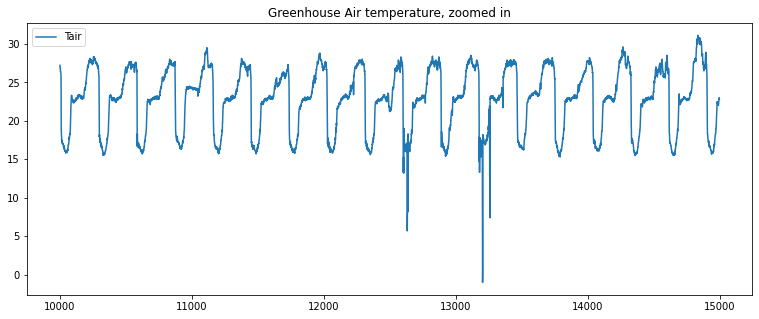

In [20]:
start_index = 10000
end_index = 15000

Tair_slice = Tair[start_index:end_index]

Tair_slice.plot(figsize=plotsize)
plt.title('Greenhouse Air temperature, zoomed in')


In [21]:
print ("Yes, this looks indeed like a daily cicle (there are 288 - 5 minutes in a dayt). The temperature change \
is not Gaussian though. We see an evening temperature drop, \
then in the morning a sharp temperature increase, a plateau and a second temperature incease. This needs some \
thinking. Let's come back to this later again.")

Yes, this looks indeed like a daily cicle (there are 288 - 5 minutes in a dayt). The temperature change is not Gaussian though. We see an evening temperature drop, then in the morning a sharp temperature increase, a plateau and a second temperature incease. This needs some thinking. Let's come back to this later again.


In [22]:
Tair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tair    47738 non-null  float64
dtypes: float64(1)
memory usage: 373.6 KB


In [23]:
Tair.isnull().sum()

Tair    71
dtype: int64

In [24]:
print("We see that there are 71 missing values among the 47.809 numerical entries.")
print ("Let's fill the missing values. They are not many and they are only every 5 minutes, so the method we \
chose won't make a big difference. Let's do a simple foreward fill.")

We see that there are 71 missing values among the 47.809 numerical entries.
Let's fill the missing values. They are not many and they are only every 5 minutes, so the method we chose won't make a big difference. Let's do a simple foreward fill.


In [25]:
Tair = Tair.fillna(method='ffill')
Tair.isnull().sum()

Tair    0
dtype: int64

cool, there are no missing values any more.
Since we are interested in hourly observations let's smoothen the data from 5-mins to hourly.


Text(0.5, 1.0, 'Greenhouse Air temperature, hourly ')

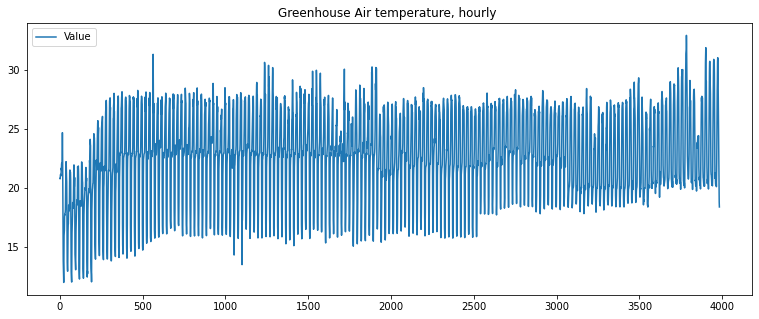

In [26]:
print ("cool, there are no missing values any more.")
print ("Since we are interested in hourly observations let's smoothen the data from 5-mins to hourly.")

# Becausd the length of Tair (47809) is not devided exactly with 12 I make the number of groups and a new length to fit them
num_groups = len(Tair) // 12
new_length = num_groups * 12

# Reshape the DataFrame with 12 rows
Tair_reshape = Tair.values[:new_length].reshape(num_groups, 12)

# Calculate the mean along the rows
Tair_mean = np.mean(Tair_reshape, axis=1)

# Create a new DataFrame with the averaged values
Tair_hr = pd.DataFrame(Tair_mean, columns=['Value'])

Tair_hr.plot(figsize=plotsize)
plt.title('Greenhouse Air temperature, hourly ')

In [27]:
Tair_hr.head()

,Value
0,20.77500
1,20.74167
2,20.92500
3,21.00833
4,21.11667


In [28]:
len(Tair_hr)

3984

The graph still looks quite noisy. Let's plot the daily values as well.


Text(0.5, 1.0, 'Greenhouse Air temperature, daily')

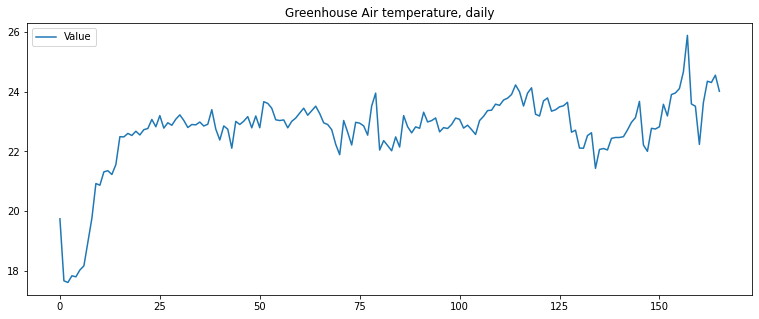

In [29]:
print ("The graph still looks quite noisy. Let's plot the daily values as well.")

num_groups = len(Tair) // 288
new_length = num_groups * 288
Tair_reshape = Tair.values[:new_length].reshape(num_groups, 288)
Tair_mean = np.mean(Tair_reshape, axis=1)
Tair_day = pd.DataFrame(Tair_mean, columns=['Value'])

Tair_day.plot(figsize=plotsize)
plt.title('Greenhouse Air temperature, daily')

In [30]:
print ("This is interesting! We now clearly see the trend at the beginning (due to change of season most likely). \
We also see some autocorrelation that was not visible in the 5-mins and hourly data because of the noise.")

This is interesting! We now clearly see the trend at the beginning (due to change of season most likely). We also see some autocorrelation that was not visible in the 5-mins and hourly data because of the noise.


In [31]:
print ("Out of curiocity, let's see how the temperature inside the greenhouse relates to the observed temperature \
outside of it.")

Out of curiocity, let's see how the temperature inside the greenhouse relates to the observed temperature outside of it.


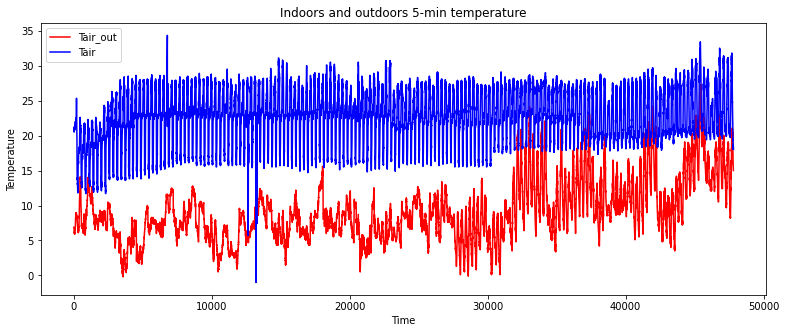

In [32]:
Tair_out = df_outd[['Tout']]


fig, ax = plt.subplots(figsize=plotsize)
ax.plot(Tair_out.index, Tair_out, color='red', label='Tair_out')
ax.plot(Tair.index, Tair, color='blue', label='Tair')

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.legend()
ax.set_title('Indoors and outdoors 5-min temperature')

plt.show()



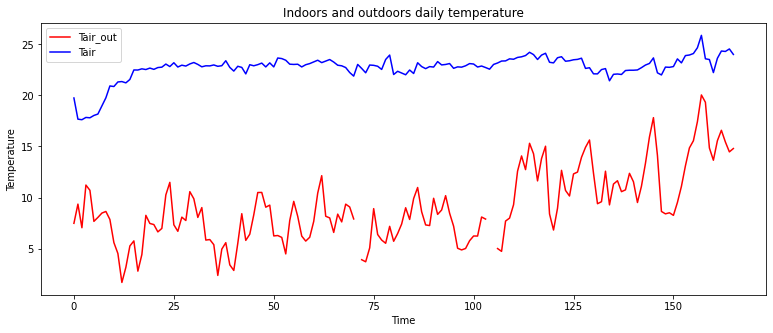

In [33]:
Tair_out = df_outd[['Tout']]
num_groups = len(Tair_out) // 288
new_length = num_groups * 288
Tair_reshape = Tair_out.values[:new_length].reshape(num_groups, 288)
Tair_mean = np.mean(Tair_reshape, axis=1)
Tairout_day = pd.DataFrame(Tair_mean, columns=['Value'])


fig, ax = plt.subplots(figsize=plotsize)
ax.plot(Tairout_day.index, Tairout_day, color='red', label='Tair_out')
ax.plot(Tair_day.index, Tair_day, color='blue', label='Tair')

ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.legend()
ax.set_title('Indoors and outdoors daily temperature')

plt.show()

In [34]:
print ("We can see that the outdoors temperature timeseries is non-stationary, as there is heteroscedasticity and \
autocorrelation and seasonality.")
print ("")
print ("By comparing the in- with the out-door temperature we can see how more smooth the indoor temperature is. \
We see that the average difference in T in and out is more than 10 degrees. We can also see that my initial assumption \
that there is a transition from spring to summer to autumn was not correct! We rather see a transition from a \
(cold) spring to more summer-like temperatures (assuming this is data from the Netherlands of course!). My assumption \
now is that the increase that we see in the T in at the beginning of the measurments and the abrupt drop after the \
second half is that this is intentionaly done to help the plant growth.")

We can see that the outdoors temperature timeseries is non-stationary, as there is heteroscedasticity and autocorrelation and seasonality.

By comparing the in- with the out-door temperature we can see how more smooth the indoor temperature is. We see that the average difference in T in and out is more than 10 degrees. We can also see that my initial assumption that there is a transition from spring to summer to autumn was not correct! We rather see a transition from a (cold) spring to more summer-like temperatures (assuming this is data from the Netherlands of course!). My assumption now is that the increase that we see in the T in at the beginning of the measurments and the abrupt drop after the second half is that this is intentionaly done to help the plant growth.


In [35]:
comment = "**3. Stationarity Tests**"
font_size = "20px"

Markdown(f"<span style='font-weight:bold; font-size:{font_size}'>{comment}</span>")

<span style='font-weight:bold; font-size:20px'>**3. Stationarity Tests**</span>

In [36]:
print ("It is important to determine whether the Tair is stationary. This will determine which methods we will \
use to forecast it, and will tell whether we have to transform the data to get a cleaner signal (in non-stationary).")
print ("In order for  a timeseries data to be stationary, the data must exhibit four properties over time: 1) \
constant mean (no trend), 2) constant variance (no heteroscedasticity), 3) constant autocorrelation structure, \
4) no periodic component (no seasonality).")
print ("Above we discussed visually that the data seem to have to some extend a constant mean, a constant variance \
a daily periodicity and some autocorrelation when the daily values are averaged.")


print("Now let's use some summary statistics and statistical tests to determine the stationarity.")

It is important to determine whether the Tair is stationary. This will determine which methods we will use to forecast it, and will tell whether we have to transform the data to get a cleaner signal (in non-stationary).
In order for  a timeseries data to be stationary, the data must exhibit four properties over time: 1) constant mean (no trend), 2) constant variance (no heteroscedasticity), 3) constant autocorrelation structure, 4) no periodic component (no seasonality).
Above we discussed visually that the data seem to have to some extend a constant mean, a constant variance a daily periodicity and some autocorrelation when the daily values are averaged.
Now let's use some summary statistics and statistical tests to determine the stationarity.


In [37]:
Tair_hr_values = Tair_hr.values
chunks = np.array_split(Tair_hr_values[:, 0], 50)

chunks[0]

array([20.775     , 20.74166667, 20.925     , 21.00833333, 21.11666667,
       20.98333333, 21.09166667, 21.15      , 21.65      , 21.49166667,
       22.01666666, 22.05833333, 21.82500001, 21.68333333, 22.91666666,
       24.65833333, 23.35      , 20.81666667, 17.65833334, 14.53333334,
       13.80833333, 13.175     , 12.55833333, 11.95833333, 14.46666666,
       15.93333333, 16.175     , 16.41666666, 17.49166666, 17.725     ,
       17.675     , 17.85833333, 17.88333333, 18.13333333, 19.36666666,
       20.31666666, 20.95      , 22.19999999, 22.03333333, 21.24166667,
       20.85      , 20.50833333, 18.75000001, 15.56666667, 13.69166667,
       13.1       , 12.925     , 12.90833333, 14.85833332, 16.29166666,
       16.85833333, 16.91666666, 17.79166666, 18.51666666, 18.29166667,
       18.01666667, 18.10833333, 18.225     , 20.        , 21.3       ,
       21.48333333, 21.48333334, 21.05833333, 21.33333334, 21.15      ,
       20.58333333, 17.45000002, 13.70833333, 12.88333334, 12.39

In [38]:
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 18.2396 | 10.4118
    2 | 18.3018 | 9.2496
    3 | 19.4288 | 15.9035
    4 | 21.0478 | 17.9846
    5 | 22.5196 | 20.286
    6 | 22.1696 | 22.8943
    7 | 22.6919 | 17.2257
    8 | 23.3164 | 15.1268
    9 | 22.6403 | 15.5943
   10 | 23.0004 | 13.8433
   11 | 23.2543 | 15.0368
   12 | 22.6644 | 15.9071
   13 | 22.6557 | 12.6901
   14 | 23.0409 | 16.0373
   15 | 22.746 | 16.9179
   16 | 23.2919 | 16.5727
   17 | 23.5159 | 15.0981
   18 | 22.6602 | 15.4158
   19 | 23.2593 | 13.5949
   20 | 23.7118 | 16.1951
   21 | 22.2999 | 13.6625
   22 | 22.5501 | 10.5809
   23 | 23.0509 | 13.9558
   24 | 22.9685 | 19.048
   25 | 22.1141 | 11.8366
   26 | 22.8354 | 12.3359
   27 | 22.467 | 14.4393
   28 | 22.9278 | 13.1766
   29 | 23.2932 | 13.7182
   30 | 22.6157 | 17.0552
   31 | 22.8194 | 13.3028
   32 | 23.1356 | 12.6402
   33 | 23.2129 | 10.8642
   34 | 23.6071 | 8.64246
   35 | 24.1937 | 9.29517
   36 | 23.7237 | 9.49956
   37 | 23.3552

In [39]:
print ("There is some small deviation from the mean, where the initial values are a little smaller and the last ones \
a little higher, but not too much. There is some change in the variance, but it is not too big. Let's do more tests \
before we drive conclusions.")

There is some small deviation from the mean, where the initial values are a little smaller and the last ones a little higher, but not too much. There is some change in the variance, but it is not too big. Let's do more tests before we drive conclusions.


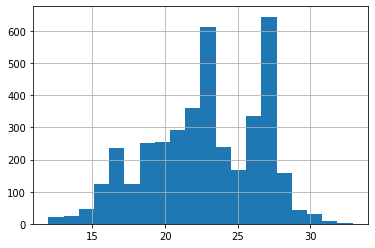

In [40]:
Tair_hr_values = Tair_hr.values
Tair_hr_series = pd.Series(Tair_hr_values[:, 0])

Tair_hr_series.hist(bins=20)

In [41]:
print ("This is not a Gaussian distribution. This indicates that the dataset is non stationary. \
In the histogram we can see the daily cicle of the data.")

This is not a Gaussian distribution. This indicates that the dataset is non stationary. In the histogram we can see the daily cicle of the data.


In [42]:
print("Let's run the augmented Dikey-Fuller statistical test to test the \
stationarity of our dataset. The null hypothesis is that the series is nonstationary. We set a significance \
level to accept or reject the null to 0.05.")
# lets transform the pandas dataframe to a numpy array
Tair_hr_values = Tair_hr.values
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(Tair_hr_values[:, 0])

print("The adf value is ",adf)
print ("The more negative the value, the more confident we can be that the series is stationary. But let's \
print the p-value:",pvalue)
print ("The p-value is too small, so we reject the null that our data is nonstationary")

print ("The Dickey-Fuller test indicates that the dataset is stationary, but we do see a daily pattern in the data. \
This can happen because the test primarily focuses on detecting trends rather than periodic patterns.")


Let's run the augmented Dikey-Fuller statistical test to test the stationarity of our dataset. The null hypothesis is that the series is nonstationary. We set a significance level to accept or reject the null to 0.05.
The adf value is  -3.933187900689058
The more negative the value, the more confident we can be that the series is stationary. But let's print the p-value: 0.0018037339247767325
The p-value is too small, so we reject the null that our data is nonstationary
The Dickey-Fuller test indicates that the dataset is stationary, but we do see a daily pattern in the data. This can happen because the test primarily focuses on detecting trends rather than periodic patterns.


In [43]:
print ("Presence of seasonality: The ADF test is primarily designed to assess the presence of a unit root and \
does not directly account for seasonality. If the data exhibits significant seasonal patterns, the ADF test may \
fail to identify non-stationarity caused by seasonal components. Let's run an ADF test that has a focus on seasonality")

Presence of seasonality: The ADF test is primarily designed to assess the presence of a unit root and does not directly account for seasonality. If the data exhibits significant seasonal patterns, the ADF test may fail to identify non-stationarity caused by seasonal components. Let's run an ADF test that has a focus on seasonality


In [44]:
from statsmodels.tsa.stattools import adfuller

# Assuming Tair_hr_values is your hourly dataset
Tair_hr_series = pd.Series(Tair_hr_values[:, 0])

# Perform the ADF test on the seasonal component
adf_result = adfuller(Tair_hr_series.diff(24).dropna())

# Extract the p-value
p_value = adf_result[1]

# Print the test result and explanation
print("ADF Test Result:")
if p_value < 0.05:
    print("The dataset is not stationary, indicating the presence of a daily cycle.")
else:
    print("The dataset is stationary.")

ADF Test Result:
The dataset is not stationary, indicating the presence of a daily cycle.


In [45]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test
result = kpss(Tair_hr_values[:, 0])

# Extract the p-value from the test result
p_value = result[1]

# Compare the p-value with a significance level (e.g., 0.05) to determine stationarity
if p_value < 0.05:
    print("The time series is not stationary.")
else:
    print("The time series is stationary.")
print (p_value)

The time series is not stationary.
0.01


In [46]:
comment = "**4. Univariate Temperature forecasting using smoothing**"
font_size = "20px"

Markdown(f"<span style='font-weight:bold; font-size:{font_size}'>{comment}</span>")

<span style='font-weight:bold; font-size:20px'>**4. Univariate Temperature forecasting using smoothing**</span>

In [47]:
print ("We will forecast the last 24 hours of the indoors temperature using:")
print ("1. Simple Average Smoothing")
print ("2. Triple Exponential Smoothing")

print ("We won't use the single exponential smoothing because it is mainly useful for short-term \
forecasting and when the data has a gradual or linear trend that needs to be captured. \
Likewise, we skip the double exponential smoothing because it refers to timeseries \
with a trend. We have a look at the triplpe exponential smoothing that refers to \
timeseries with trend and seasonality. There is no significant trend in our data though.")

We will forecast the last 24 hours of the indoors temperature using:
1. Simple Average Smoothing
2. Triple Exponential Smoothing
We won't use the single exponential smoothing because it is mainly useful for short-term forecasting and when the data has a gradual or linear trend that needs to be captured. Likewise, we skip the double exponential smoothing because it refers to timeseries with a trend. We have a look at the triplpe exponential smoothing that refers to timeseries with trend and seasonality. There is no significant trend in our data though.


In [48]:
train = Tair_hr_values[:-24]
test = Tair_hr_values[-24:]
train[3900:-24],test

(array([[31.16666667],
        [31.86666667],
        [29.38333333],
        [28.18333333],
        [29.00833333],
        [27.44166667],
        [25.00833334],
        [22.73333333],
        [21.7       ],
        [21.01666667],
        [20.34583333],
        [20.66666666],
        [20.74166667],
        [20.48333333],
        [20.70833333],
        [20.74166667],
        [20.275     ],
        [19.88333333],
        [20.58333333],
        [22.55833333],
        [24.4       ],
        [26.49166666],
        [27.73333333],
        [29.75      ],
        [30.6       ],
        [30.70833333],
        [29.89166666],
        [28.61666667],
        [28.65000002],
        [27.93333334],
        [25.39166667],
        [22.75000001],
        [21.39166666],
        [21.10833333],
        [21.06666666],
        [20.86666667]]), array([[20.31666667],
        [20.23333333],
        [20.325     ],
        [20.43333333],
        [20.45      ],
        [20.075     ],
        [20.85      ],
        [2

In [49]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

In [50]:
# find mean of series
trend_seasonal_avg = np.mean(Tair_hr_values)

# create array of mean value equal to length of time array
simple_avg_preds = np.full(shape=len(test), fill_value=trend_seasonal_avg, dtype='float')

# mse
simple_mse = mse(test, simple_avg_preds)

# results
print("Predictions: ", simple_avg_preds)
print("MSE: ", simple_mse)

Predictions:  [22.71656505 22.71656505 22.71656505 22.71656505 22.71656505 22.71656505
 22.71656505 22.71656505 22.71656505 22.71656505 22.71656505 22.71656505
 22.71656505 22.71656505 22.71656505 22.71656505 22.71656505 22.71656505
 22.71656505 22.71656505 22.71656505 22.71656505 22.71656505 22.71656505]
MSE:  [470.80015169 470.80015169 470.80015169 470.80015169 470.80015169
 470.80015169 470.80015169 470.80015169 470.80015169 470.80015169
 470.80015169 470.80015169 470.80015169 470.80015169 470.80015169
 470.80015169 470.80015169 470.80015169 470.80015169 470.80015169
 470.80015169 470.80015169 470.80015169 470.80015169]


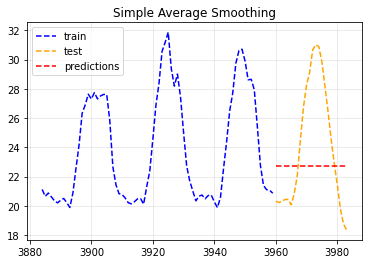

In [51]:
time = np.arange(3984)
train_subset = train[-100:].flatten()
plt.plot(time[-100:-24], train_subset[:-24], 'b--', label="train")
plt.plot(time[-24:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-24:], simple_avg_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing")
plt.grid(alpha=0.3)

In [52]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=13).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)
print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

Predictions:  [20.75802878 20.75785392 20.79466218 20.7856051  20.82008972 20.78557375
 20.78921815 20.77163693 20.77400625 20.75883463 20.74187863 20.75390028
 20.74171441 20.75807602 20.75790117 20.79470943 20.78565234 20.82013697
 20.78562099 20.7892654  20.77168417 20.7740535  20.75888188 20.74192588]
MSE:  [684.57715711 684.60446223 678.88882858 680.28919212 674.9783876
 680.29404666 679.73008658 682.45660366 682.08830084 684.45133315
 687.10536361 685.22225721 687.13113646 684.56977963 684.59708436
 678.88153418 680.28187718 674.97115086 680.28673164 679.72277983
 682.44925704 682.08095959 684.4439575  687.09794951]


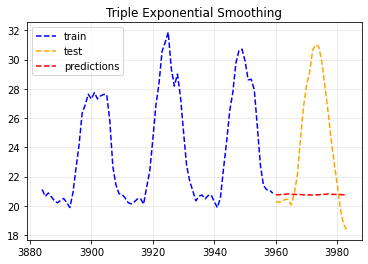

In [53]:
time = np.arange(3984)
train_subset = train[-100:].flatten()
plt.plot(time[-100:-24], train_subset[:-24], 'b--', label="train")
plt.plot(time[-24:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-24:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

In [54]:
print ("Indeed it does not do a very good job at predicting temperature values.")

Indeed it does not do a very good job at predicting temperature values.


In [55]:
print("COMPARISON")
data_dict = {'MSE':[np.mean(simple_mse), np.mean(triple_mse)]}
df = pd.DataFrame(data_dict, index=['simple', 'triple'])
print(df)

COMPARISON
             MSE
simple 470.80015
triple 682.13334


In [56]:
comment = "**5. Univariate Temperature forecasting using SARIMA Model**"
font_size = "20px"

Markdown(f"<span style='font-weight:bold; font-size:{font_size}'>{comment}</span>")

<span style='font-weight:bold; font-size:20px'>**5. Univariate Temperature forecasting using SARIMA Model**</span>

In [57]:
print ("We are going to use a SARIMA model to predict indoors temperature. The SARIMA stands \
for Seasonal Autoregressive Integrated Moving Average Model.")

We are going to use a SARIMA model to predict indoors temperature. The SARIMA stands for Seasonal Autoregressive Integrated Moving Average Model.


In [58]:
"""
order(p,d,q):
p is number of AR terms
d is number of times that we would difference our data
q is number of MA terms
When we work with SARIMA models 'S' refers to 'seasonal' and we have the additional 
standard inputs:

seasonal order(p,d,q):
p is number of AR terms in regards to seasonal lag
d is number of times that we would difference our seasonal lag (as seen above)
q is number of MA terms in regards to seasonal lag
s is number of periods in a season
"""

"\norder(p,d,q):\np is number of AR terms\nd is number of times that we would difference our data\nq is number of MA terms\nWhen we work with SARIMA models 'S' refers to 'seasonal' and we have the additional \nstandard inputs:\n\nseasonal order(p,d,q):\np is number of AR terms in regards to seasonal lag\nd is number of times that we would difference our seasonal lag (as seen above)\nq is number of MA terms in regards to seasonal lag\ns is number of periods in a season\n"

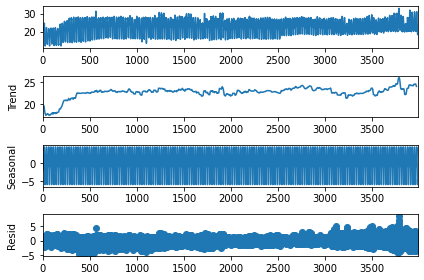

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(Tair_hr[:],period=24).plot();

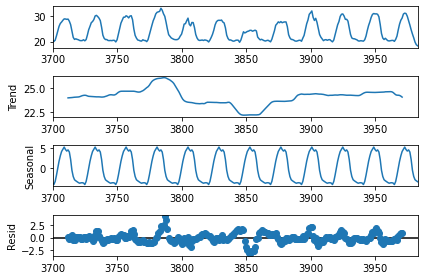

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(Tair_hr[3700:],period=24).plot();

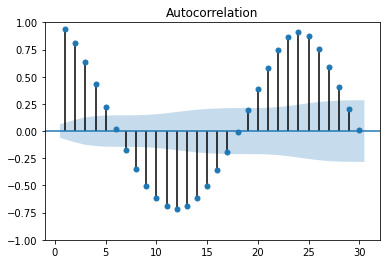

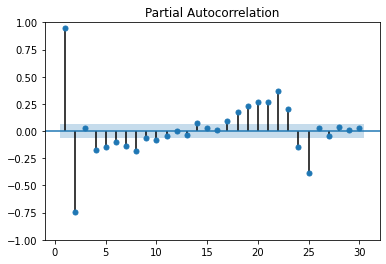

In [61]:
import statsmodels.api as sm

sm.tsa.graphics.plot_acf(Tair_hr[3000:],zero=False)
sm.tsa.graphics.plot_pacf(Tair_hr[3000:],zero = False);

In [62]:
print ("Now let's start with the most basic model, with no auto correlation and we just \
difference the values and predict moving foreward.")

sar = sm.tsa.statespace.SARIMAX(Tair_hr.iloc[:, 0], 
                                order=(0,0,0), 
                                seasonal_order=(0,1,0,24), 
                                trend='c').fit()

Now let's start with the most basic model, with no auto correlation and we just difference the values and predict moving foreward.


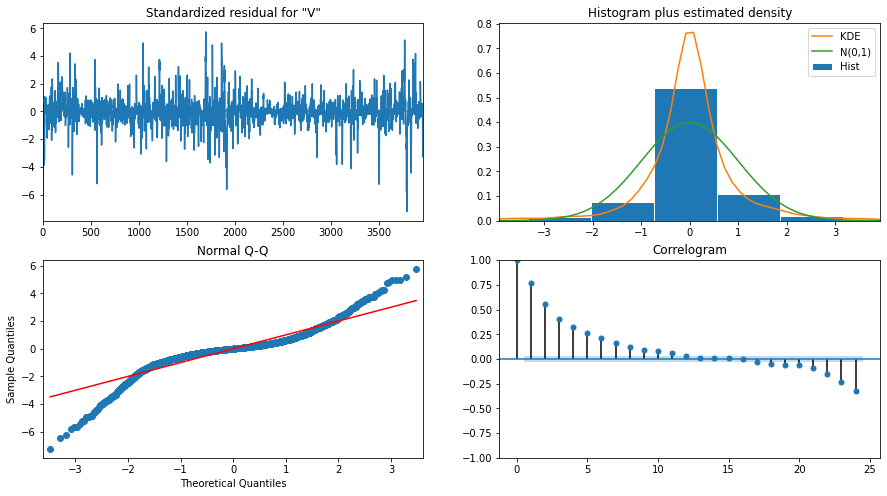

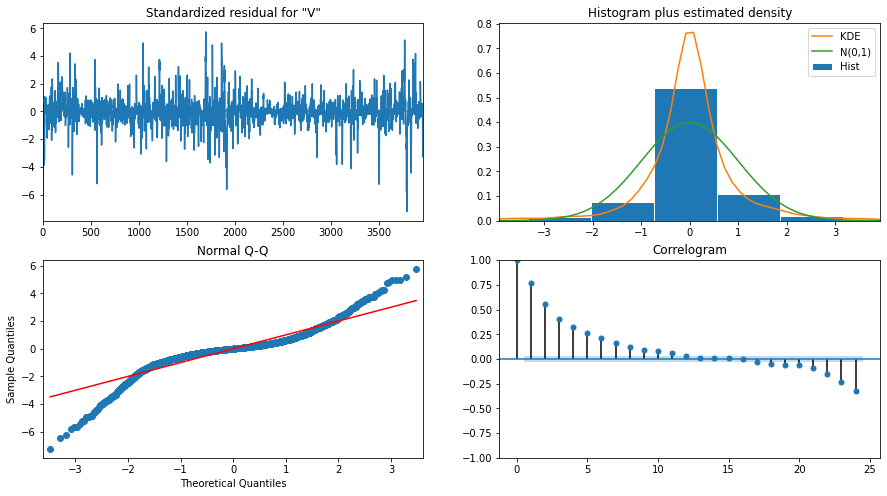

In [63]:
sar.plot_diagnostics(figsize = (15,8),lags=24)

In [64]:
print ("The pattern in the residuals suggests that the model can be further improved. \
The histogram suggests that the standardized residuals follow to some approximation the \
normal distribution. The plot compares the quantiles of the observed data against the \
quantiles of a theoretical standard normal distribution. We see some skewness and some \
outliers. The correlogram suggests significant autocorrelation because the autocorrelation \
falls really outside the confidence intervals.")

The pattern in the residuals suggests that the model can be further improved. The histogram suggests that the standardized residuals follow to some approximation the normal distribution. The plot compares the quantiles of the observed data against the quantiles of a theoretical standard normal distribution. We see some skewness and some outliers. The correlogram suggests significant autocorrelation because the autocorrelation falls really outside the confidence intervals.


In [65]:
Tair_hr_values = Tair_hr.values
Tair_hr.iloc[2000:, 0]

2000   23.24167
2001   24.37500
2002   24.10833
2003   24.58333
2004   25.39167
         ...   
3979   22.91667
3980   21.44167
3981   19.80000
3982   18.77917
3983   18.35833
Name: Value, Length: 1984, dtype: float64

In [66]:
Tair_hr.index

RangeIndex(start=0, stop=3984, step=1)

In [67]:
print ("for the next steps we need to set a datetime to the data")
start_date = '2013-01-01'
end_date = '2023-11-28'
step = pd.DateOffset(days=1)

Tair_hr_index = pd.date_range(start=start_date, end=end_date, freq=step)

# Print the first few values
print(Tair_hr_index[:5])

for the next steps we need to set a datetime to the data
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05'],
              dtype='datetime64[ns]', freq='<DateOffset: days=1>')


In [69]:
Tair_hr.index = Tair_hr_index
Tair_hr.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2023-11-19', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-23', '2023-11-24', '2023-11-25', '2023-11-26',
               '2023-11-27', '2023-11-28'],
              dtype='datetime64[ns]', length=3984, freq='<DateOffset: days=1>')

In [70]:
df_train = Tair_hr.iloc[3500:-24, 0]
df_test = Tair_hr.iloc[-24:, 0]
df_train.tail()

2023-10-31   23.13333
2023-11-01   21.36667
2023-11-02   20.79167
2023-11-03   21.26667
2023-11-04   20.74167
Freq: <DateOffset: days=1>, Name: Value, dtype: float64

In [71]:
df_test.head()

2023-11-05   20.31667
2023-11-06   20.23333
2023-11-07   20.32500
2023-11-08   20.43333
2023-11-09   20.45000
Freq: <DateOffset: days=1>, Name: Value, dtype: float64

In [72]:
print ("Let's run auto ARIMA that will give us the best fitting terms that result in the \
smallest AIC (Akaike Information Criterion, a metric used to compare the performance \
of different models).")
print("I have commented out the lines below because it takes minutes to run \
the script and we don't want to wait during the interview :)")
import pmdarima as pm
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(df_train, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=24, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
print("Best Parameters (p, d, q, P, D, Q, s):", SARIMA_model.order, SARIMA_model.seasonal_order)
print(SARIMA_model.aic())

Let's run auto ARIMA that will give us the best fitting terms that result in the smallest AIC (Akaike Information Criterion, a metric used to compare the performance of different models).
I have commented out the lines below because it takes minutes to run the script and we don't want to wait during the interview :)
Best Parameters (p, d, q, P, D, Q, s): (2, 0, 1) (2, 1, 0, 24)
735.4039780741509


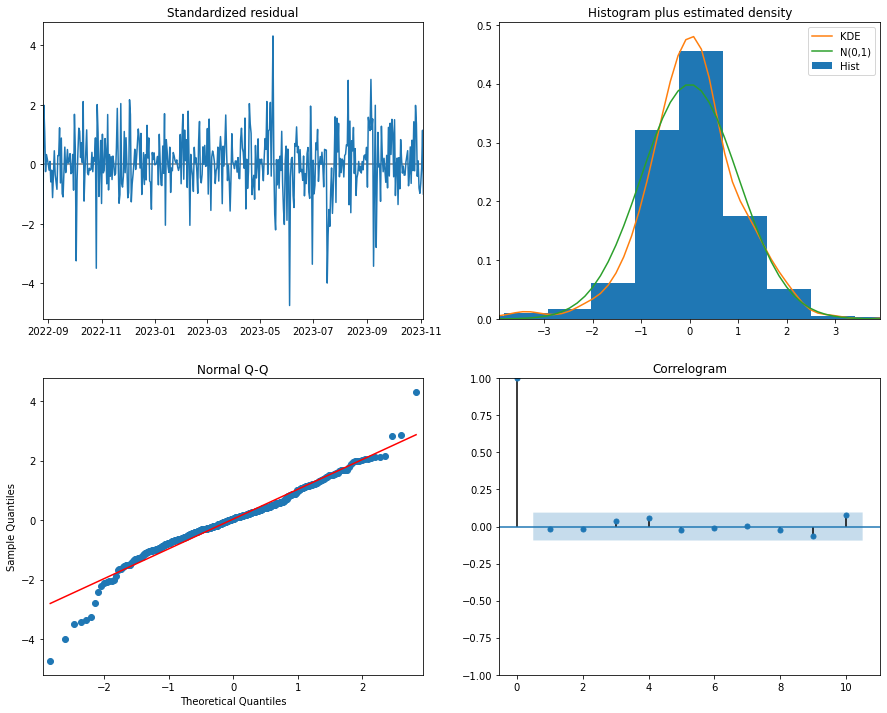

In [75]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [76]:
print ("Here we see more like a random noise in the residuals, a faily normal distribution \
and almost no autocorrelation.")

Here we see more like a random noise in the residuals, a faily normal distribution and almost no autocorrelation.


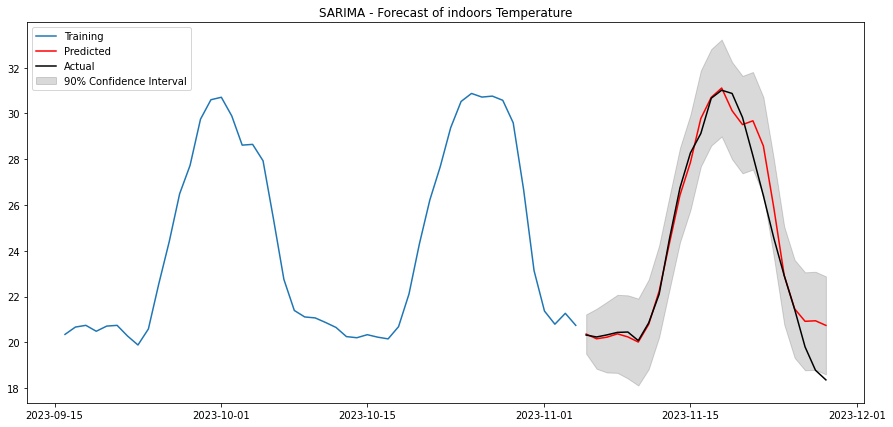

In [77]:
def forecast(SARIMA_model, periods=24):
    # Forecast
    n_periods = periods
    fitted, confint = SARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(df_train.index[-1] + pd.DateOffset(days=1), periods = n_periods, freq='D')
    
    forecast_values_auto = fitted
    #confidence_intervals_auto = conf_int_auto


    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    forecast_auto = fitted_series.values
    lower_percentile = np.percentile(confint, 10, axis=1)
    upper_percentile = np.percentile(confint, 90, axis=1)

    
    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df_train[-50:], color='#1f76b4', label='Training')
    plt.plot(fitted_series, color='red', label='Predicted')
    plt.plot(df_test, color='black', label='Actual')
    plt.fill_between(lower_series.index, lower_percentile, upper_percentile, color='k', alpha=.15, label='90% Confidence Interval')

    plt.title("SARIMA - Forecast of indoors Temperature")
    plt.legend(loc='upper left')
    plt.show()

forecast(SARIMA_model)

In [78]:

SARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  460
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 24)   Log Likelihood                -361.702
Date:                             Sun, 09 Jul 2023   AIC                            735.404
Time:                                     14:50:39   BIC                            759.870
Sample:                                 08-02-2022   HQIC                           745.059
                                      - 11-04-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6469      0.134      4.826      0.000       0.384       0.910
ar.L2          0.1994      0.123      1.616      0.106      -0.042       0.441
ma.L1          0.5068      0.119      4.255      0.000       0.273       0.740
ar.S.L24      -0.5121      0.036    -14.065      0.000      -0.583      -0.441
ar.S.L48      -0.2994      0.046     -6.535      0.000      -0.389      -0.210
sigma2         0.3004      0.014     21.221      0.000       0.273       0.328
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):               158.97
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.43
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
# Predicted values and actual values
forecast_auto, conf_int_auto = SARIMA_model.predict(n_periods=24,
                                             return_conf_int=True)
predicted_values_auto = forecast_auto.values
actual_values = df_test.values.flatten()

# Mean Absolute Error (MAE)
maeSA = np.mean(np.abs(predicted_values_auto - actual_values))
print("MAE:", maeSA)

# Root Mean Squared Error (RMSE)
mseSA = np.mean((predicted_values_auto - actual_values) ** 2)
rmseSA = np.sqrt(mseSA)
print("MSE:", rmseSA)
print("RMSE:", rmseSA)

# Mean Absolute Percentage Error (MAPE)
mapeSA = np.mean(np.abs((predicted_values_auto - actual_values) / actual_values)) * 100
print("MAPE:", mapeSA)

MAE: 0.5940614094719291
MSE: 0.9558774709361916
RMSE: 0.9558774709361916
MAPE: 2.6084199193111255


In [80]:
comment = "**6. Multivariate Temperature forecasting using SARIMAX Model**"
font_size = "20px"

Markdown(f"<span style='font-weight:bold; font-size:{font_size}'>{comment}</span>")

<span style='font-weight:bold; font-size:20px'>**6. Multivariate Temperature forecasting using SARIMAX Model**</span>

In [81]:
print("SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) \
is an updated version of the ARIMA model. ARIMA includes an autoregressive integrated moving \
average, while SARIMAX includes seasonal effects and eXogenous factors with the \
autoregressive and moving average component in the model.")

SARIMAX(Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors) is an updated version of the ARIMA model. ARIMA includes an autoregressive integrated moving average, while SARIMAX includes seasonal effects and eXogenous factors with the autoregressive and moving average component in the model.


In [82]:
print ("we have lots of variables that could influence the indoors temperature. Some of \
them are clearly not important (eg drain pH and drain EC). For the rest we can to a feauture \
importance analysis, to see which among the variables explain most of the variance")

we have lots of variables that could influence the indoors temperature. Some of them are clearly not important (eg drain pH and drain EC). For the rest we can to a feauture importance analysis, to see which among the variables explain most of the variance


In [83]:
df_outd.head()


,time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,"43,815.00000",6.22095,0.00000,0.00000,-72.00000,215.00000,0.00000,80.60000,6.90000,32.00000,4.70000
1,"43,815.00347",6.22095,0.00000,0.00000,-73.00000,0.00000,0.00000,80.60000,6.90000,32.00000,4.70000
2,"43,815.00694",6.20556,0.00000,0.00000,-76.00000,0.00000,0.00000,80.40000,6.90000,32.00000,4.70000
3,"43,815.01042",6.19017,0.00000,0.00000,-77.00000,0.00000,0.00000,80.20000,6.90000,32.00000,4.70000
4,"43,815.01389",6.16262,0.00000,0.00000,-75.00000,0.00000,0.00000,80.90000,6.70000,32.00000,4.70000


In [84]:
df_ind.head()


,time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,Rhair,Tair,Tot_PAR,Tot_PAR_Lamps,VentLee,Ventwind,assim_sp,assim_vip,co2_dos,co2_sp,co2_vip,dx_sp,dx_vip,int_blue_sp,int_blue_vip,int_farred_sp,int_farred_vip,int_red_sp,int_red_vip,int_white_sp,int_white_vip,pH_drain_PC,scr_blck_sp,scr_blck_vip,scr_enrg_sp,scr_enrg_vip,t_grow_min_sp,t_grow_min_vip,t_heat_sp,t_heat_vip,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,"43,815.00000",0.00000,35.00000,472.00000,0.35480,3.98000,100.00000,7.17000,0.00000,45.20000,60.60000,20.90000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,NaN,NaN,400.00000,NaN,2.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.27000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,4.00000,NaN,"1,000.00000",NaN,1.20000
1,"43,815.00347",0.00000,85.00000,501.00000,0.53220,3.99000,100.00000,6.94000,0.00000,43.60000,61.40000,20.70000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00034,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.28000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
2,"43,815.00694",0.00000,96.00000,489.00000,0.53220,3.99000,100.00000,7.24000,0.00000,42.30000,60.90000,21.20000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00036,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.28000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
3,"43,815.01042",0.00000,96.00000,497.00000,0.53220,4.00000,100.00000,6.74000,0.00000,41.20000,62.50000,20.70000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00201,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.27000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
4,"43,815.01389",0.00000,96.00000,477.00000,0.53220,4.00000,100.00000,6.71000,0.00000,41.20000,62.70000,20.70000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00155,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.28000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000


In [85]:
print ("we have to combine the dataframes:")
df_combined = pd.concat([df_outd, df_ind], axis=1)
df_combined.head()

we have to combine the dataframes:


,time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp,time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,Rhair,Tair,Tot_PAR,Tot_PAR_Lamps,VentLee,Ventwind,assim_sp,assim_vip,co2_dos,co2_sp,co2_vip,dx_sp,dx_vip,int_blue_sp,int_blue_vip,int_farred_sp,int_farred_vip,int_red_sp,int_red_vip,int_white_sp,int_white_vip,pH_drain_PC,scr_blck_sp,scr_blck_vip,scr_enrg_sp,scr_enrg_vip,t_grow_min_sp,t_grow_min_vip,t_heat_sp,t_heat_vip,t_rail_min_sp,t_rail_min_vip,t_vent_sp,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_sp_min,water_sup_intervals_vip_min,window_pos_lee_sp,window_pos_lee_vip
0,"43,815.00000",6.22095,0.00000,0.00000,-72.00000,215.00000,0.00000,80.60000,6.90000,32.00000,4.70000,"43,815.00000",0.00000,35.00000,472.00000,0.35480,3.98000,100.00000,7.17000,0.00000,45.20000,60.60000,20.90000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,NaN,NaN,400.00000,NaN,2.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.27000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,4.00000,NaN,"1,000.00000",NaN,1.20000
1,"43,815.00347",6.22095,0.00000,0.00000,-73.00000,0.00000,0.00000,80.60000,6.90000,32.00000,4.70000,"43,815.00347",0.00000,85.00000,501.00000,0.53220,3.99000,100.00000,6.94000,0.00000,43.60000,61.40000,20.70000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00034,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.28000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
2,"43,815.00694",6.20556,0.00000,0.00000,-76.00000,0.00000,0.00000,80.40000,6.90000,32.00000,4.70000,"43,815.00694",0.00000,96.00000,489.00000,0.53220,3.99000,100.00000,7.24000,0.00000,42.30000,60.90000,21.20000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00036,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.28000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
3,"43,815.01042",6.19017,0.00000,0.00000,-77.00000,0.00000,0.00000,80.20000,6.90000,32.00000,4.70000,"43,815.01042",0.00000,96.00000,497.00000,0.53220,4.00000,100.00000,6.74000,0.00000,41.20000,62.50000,20.70000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00201,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.27000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000
4,"43,815.01389",6.16262,0.00000,0.00000,-75.00000,0.00000,0.00000,80.90000,6.70000,32.00000,4.70000,"43,815.01389",0.00000,96.00000,477.00000,0.53220,4.00000,100.00000,6.71000,0.00000,41.20000,62.70000,20.70000,0.00000,0.00000,0.80000,0.00000,NaN,0.00000,0.00155,NaN,400.00000,NaN,2.20000,0.00000,NaN,0.00000,NaN,0.00000,NaN,0.00000,NaN,6.28000,NaN,96.00000,NaN,100.00000,NaN,10.00000,NaN,21.00000,NaN,0.00000,NaN,25.00000,26.00000,6.00000,NaN,"1,000.00000",NaN,1.20000


In [86]:
print ("drop variables with many NaN values and then drop the Nan lines. Then take the \
hourly values")
df_combined_filtered = df_combined.dropna(axis=1, thresh=df_combined.shape[0]-150)
df_combined_filtered = df_combined_filtered.dropna()
num_groups = len(df_combined_filtered) // 12

# Take the average every 12 rows
df_combined_hr = df_combined_filtered.iloc[:num_groups*12].groupby(df_combined_filtered.index // 12).mean()

df_combined_hr

drop variables with many NaN values and then drop the Nan lines. Then take the hourly values


,time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp,time,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,Rhair,Tair,Tot_PAR,Tot_PAR_Lamps,VentLee,Ventwind,assim_vip,co2_dos,co2_vip,dx_vip,int_farred_sp,int_white_sp,pH_drain_PC,scr_blck_vip,scr_enrg_vip,t_grow_min_vip,t_heat_vip,t_rail_min_vip,t_ventlee_vip,t_ventwind_vip,water_sup,water_sup_intervals_vip_min,window_pos_lee_vip
0,"43,815.02083",6.22694,0.00000,0.00000,-72.09091,0.00000,0.00000,81.30909,6.78182,24.72727,4.06364,"43,815.02083",0.00000,95.00000,493.36364,0.53220,3.98909,100.00000,6.89000,0.00000,43.03636,61.82727,20.76364,0.00000,0.00000,0.80000,0.00000,0.00000,0.00078,400.00000,2.20000,0.00000,0.00000,6.27909,96.00000,100.00000,10.00000,21.00000,0.00000,25.00000,26.00000,6.00000,"1,000.00000",1.20000
1,"43,815.06076",6.23459,0.00000,0.00000,-75.33333,0.00000,0.00000,84.04167,6.30000,16.00000,2.90833,"43,815.06076",0.00000,96.00000,498.66667,0.53220,3.97583,100.00000,6.95917,0.00000,46.88333,61.39167,20.74167,0.00000,0.00000,0.80000,0.00000,0.00000,0.00034,400.00000,2.20000,0.00000,0.00000,6.27917,96.00000,100.00000,10.00000,21.00000,0.00000,25.00000,26.00000,6.00000,"1,000.00000",1.20000
2,"43,815.10243",6.28361,0.00000,0.00000,-59.16667,0.00000,0.00000,85.59167,6.14167,16.00000,3.20000,"43,815.10243",0.00000,96.00000,494.91667,0.04435,3.97417,100.00000,7.04167,0.00000,46.84167,61.33333,20.92500,0.00000,0.00000,0.80000,0.00000,0.00000,0.00006,400.00000,2.20000,0.00000,0.00000,6.27833,96.00000,100.00000,10.00000,21.00000,0.00000,25.00000,26.00000,0.50000,"1,000.00000",1.20000
3,"43,815.14410",6.45165,0.00000,0.00000,-52.75000,0.00000,0.00000,88.22500,6.08333,16.00000,3.32500,"43,815.14410",0.00000,96.00000,494.00000,0.00000,3.96750,100.00000,7.03167,0.00000,47.13333,61.57500,21.00833,0.00000,0.00000,0.80000,0.00000,0.00000,0.00012,400.00000,2.20000,0.00000,0.00000,6.27667,96.00000,100.00000,10.00000,21.00000,0.00000,25.00000,26.00000,0.00000,"1,000.00000",1.20000
4,"43,815.18576",6.56769,0.00000,0.00000,-53.33333,0.00000,0.00000,90.16667,6.02500,16.00000,3.61667,"43,815.18576",0.00000,96.00000,500.00000,0.00000,3.96917,100.00000,7.02000,0.00000,47.37500,61.88333,21.11667,0.00000,0.00000,0.80000,0.00000,0.00000,0.00018,400.00000,2.20000,0.00000,0.00000,6.28000,96.00000,100.00000,10.00000,21.00000,0.00000,25.00000,26.00000,0.00000,"1,000.00000",1.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,"43,980.81076",7.10976,276.75000,526.83333,-104.33333,"2,896.75000",0.00000,40.16667,20.14167,2.00000,4.20000,"43,980.81076",0.00000,0.00000,424.50000,1.59660,10.17083,0.00000,12.19417,0.00000,0.00000,40.37500,22.91667,263.41667,0.00000,100.00000,78.05000,0.00000,0.00125,400.00000,2.20000,0.00000,0.00000,4.42833,96.00000,100.00000,0.00000,10.00000,0.00000,18.00000,20.00000,18.00000,30.00000,0.00000
3980,"43,980.85243",7.47256,121.66667,235.33333,-99.83333,"2,966.66667",0.00000,44.49167,19.29167,2.00000,3.99167,"43,980.85243",0.00000,0.00000,431.33333,1.59660,10.19667,0.00000,10.38667,0.00000,0.00000,44.72500,21.44167,117.66667,0.00000,100.00000,57.86667,0.00000,0.00113,400.00000,2.20000,0.00000,0.00000,4.44000,96.00000,85.00000,0.00000,10.00000,0.00000,18.00000,20.00000,18.00000,30.00000,0.00000
3981,"43,980.89410",9.34072,20.41667,44.91667,-89.33333,"2,989.83333",0.00000,62.33333,17.42500,2.00000,4.07500,"43,980.89410",0.00000,0.00000,435.66667,1.59660,10.26417,0.00000,6.93167,0.00000,0.00000,59.48333,19.80000,22.45833,0.00000,87.56667,8.66667,0.00000,0.00088,400.00000,2.20000,0.00000,0.00000,4.45250,96.00000,80.00000,0.00000,10.00000,0.00000,18.00000,20.00000,18.00000,30.00000,0.00000
3982,"43,980.93576",9.40363,0.00000,1.00000,-85.25000,"2,992.00000",0.00000,68.09167,16.07500,2.00000,4.30000,"43,980.93576",0.00000,0.00000,449.54167,1.59660,10.29583,0.00000,4.89917,0.00000,0.00000,69.

In [87]:
start_date = '2013-01-01'
end_date = '2023-11-27'
step = pd.DateOffset(days=1)

df_combined_hr_index = pd.date_range(start=start_date, end=end_date, freq=step)
df_combined_hr.index = df_combined_hr_index

In [88]:
from sklearn.feature_selection import SelectKBest, f_classif

target_variable = df_combined_hr['Tair']

# Selecting the features using SelectKBest and f_classif
selector = SelectKBest(f_classif, k=23)
X_new = selector.fit_transform(df_combined_hr, target_variable)
names = df_combined_hr.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data=names_scores, columns=['Feat_names', 'F_Scores'])
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                     Feat_names  F_Scores
9                          Tair       inf
15                       dx_vip       inf
18                   t_heat_vip  15.86973
19                t_ventlee_vip  11.24211
20               t_ventwind_vip   9.18111
10                      Tot_PAR   4.62515
17                 scr_enrg_vip   3.63696
12                     Ventwind   3.45646
4                      BlackScr   2.99139
5                       Cum_irr   2.79312
21                    water_sup   2.79312
1                        PARout   2.68716
0                         Iglob   2.65395
6                        HumDef   2.50714
13                    assim_vip   2.13078
22  water_sup_intervals_vip_min   2.12508
3                    AssimLight   2.12007
11                      VentLee   1.99755
7                      PipeGrow   1.94458
16                int_farred_sp   1.86257
8                         Rhair   1.83319
2                        RadSum   1.75383
14                      co2_vip   

In [89]:
print ("Most influential variables: dx_vip: Humidity deficit VIP (Vapor Pressure Deficit ), \
t_ventlee_vip: Ventilation temperature VIP (leeward vents, temperature of the incoming air) \
t_ventwind_vip: Ventilation temperature VIP (windward side), t_heat_vip: Heating temperature VIP")

Most influential variables: dx_vip: Humidity deficit VIP (Vapor Pressure Deficit ), t_ventlee_vip: Ventilation temperature VIP (leeward vents, temperature of the incoming air) t_ventwind_vip: Ventilation temperature VIP (windward side), t_heat_vip: Heating temperature VIP


In [90]:
print ("The dx_vip is directly related to the temperature, and actually is the temperature \
that influences the dx_vip. So I won't use this variable for the predition of Tair.")

The dx_vip is directly related to the temperature, and actually is the temperature that influences the dx_vip. So I won't use this variable for the predition of Tair.


In [91]:
combined_train = df_combined_hr.iloc[-500:-24]

# Create the test set
combined_test = df_combined_hr.iloc[-24:]

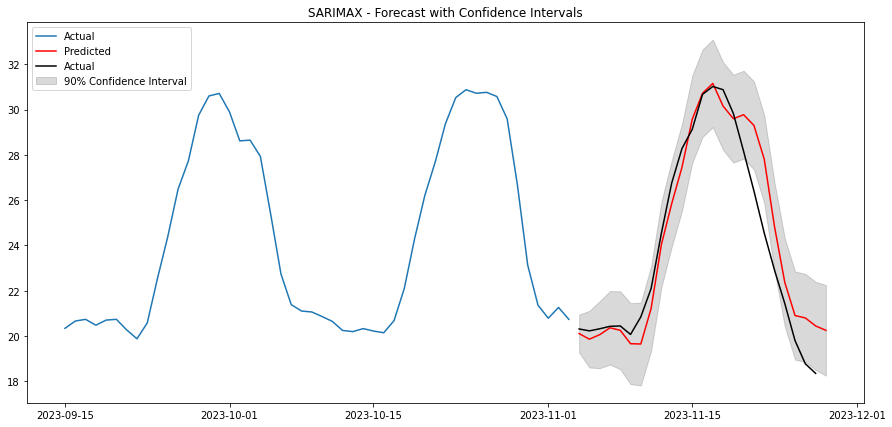

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
endog = combined_train['Tair']

# Define exogenous variables
exog_train = combined_train[['t_ventlee_vip', 't_ventwind_vip', 't_heat_vip']]

# Set the start index for prediction
start_date = combined_train.index[-1] + timedelta(days=1)  # Assuming your data has hourly frequency

# Set the end index for prediction
end_date = start_date + timedelta(days=24)

# Specify the SARIMAX model with exogenous variables
sarimax_model = SARIMAX(endog, exog=exog_train, order=(1, 0, 1), seasonal_order=(2, 1, 0, 24))

# Fit the model
results = sarimax_model.fit()

# Obtain summary statistics
summary = results.summary()

# Create exogenous variables for prediction
exog_pred = exog_train[-25:]  # Get the last 25 rows of exogenous variables

# Make predictions with confidence intervals
predictions = results.get_prediction(start=start_date, end=end_date, exog=exog_pred, dynamic=False)
predicted_values = predictions.predicted_mean
confidence_intervals = predictions.conf_int()
lower_percentile = np.percentile(confidence_intervals, 10, axis=1)
upper_percentile = np.percentile(confidence_intervals, 90, axis=1)

   
# Plotting the predictions with confidence intervals
plt.figure(figsize=(15, 7))
plt.plot(combined_train['Tair'].tail(50), label='Actual')
plt.plot(predicted_values, color='red', label='Predicted')
plt.plot(combined_test['Tair'], color='black', label='Actual')
#plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.3)
plt.fill_between(confidence_intervals.index, lower_percentile, upper_percentile, color='k', alpha=.15, label='90% Confidence Interval')

plt.title("SARIMAX - Forecast with Confidence Intervals")
plt.legend()
plt.show()

In [93]:
print ("summary statistics")
print (summary) 

summary statistics
                                      SARIMAX Results                                      
Dep. Variable:                                Tair   No. Observations:                  476
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 24)   Log Likelihood                -362.862
Date:                             Sun, 09 Jul 2023   AIC                            741.723
Time:                                     14:51:03   BIC                            774.633
Sample:                                 07-16-2022   HQIC                           754.692
                                      - 11-03-2023                                         
Covariance Type:                               opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
t_ventlee_vip     -0.2946      0.423     -0.697      0.486      -1.123       0.

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the actual values
actual_values = combined_test['Tair']

# Calculate the MAE
maeSX1 = mean_absolute_error(actual_values, predicted_values[-24:])

# Calculate the MSE
mseSX1 = mean_squared_error(actual_values, predicted_values[-24:])

# Calculate the RMSE (using mseSX1 instead of mse)
rmseSX1 = np.sqrt(mseSX1)

# Calculate the MAPE
mapeSX1 = np.mean(np.abs((actual_values - predicted_values[-24:]) / actual_values)) * 100

# Print the metrics
print("MAE:", maeSX1)
print("MSE:", mseSX1)
print("RMSE:", rmseSX1)
print("MAPE:", mapeSX1)



MAE: 0.8501748698533372
MSE: 1.055535696933144
RMSE: 1.0273926693008588
MAPE: 4.356218604685104


In [95]:
comment = "**7. Final Comparison of Models Using MSE**"
font_size = "20px"

Markdown(f"<span style='font-weight:bold; font-size:{font_size}'>{comment}</span>")

<span style='font-weight:bold; font-size:20px'>**7. Final Comparison of Models Using MSE**</span>

In [96]:
print("FINAL COMPARISON")
data_dict = {'MSE':[np.mean(simple_mse), np.mean(triple_mse), maeSA, maeSX1]}
df = pd.DataFrame(data_dict, index=['simple averaged smoothing','triple exponential smoothing'\
                                    , 'SARIMA', 'SARIMAX'])
print(df)

FINAL COMPARISON
                                   MSE
simple averaged smoothing    470.80015
triple exponential smoothing 682.13334
SARIMA                         0.59406
SARIMAX                        0.85017
